1.1

In [ ]:
import requests
from bs4 import BeautifulSoup

# %%
def get_id_list(boxurl):
    response = requests.get(url=boxurl)
    soup = BeautifulSoup(response.text, "html.parser")
    links = []
    for link in soup.find_all('a'):
        links.append(link.get('href'))
    newlinks = [item for item in links if '/releasegroup/' in item]
    id_list = [item.split('/')[2] for item in newlinks ]
    return id_list

id_list = get_id_list("https://www.boxofficemojo.com/year/world/2023")

In [41]:

# %%
def get_content_adv(boxurl):
    response = requests.get(url=boxurl)
    # 200 is normal
    # print("Check the status code", response.status_code)
    soup = BeautifulSoup(response.text, "html.parser")
    all_trs = soup.find_all("tr")
    # print(intro)
    # all_trs = ["<tr>...</tr>","<tr>...</tr>","<tr>...</tr>",...,"<tr>...</tr>"]
    records = []

    tag = 0
    for one_tr in all_trs:
        one = []
        contents = one_tr.contents
        # print(contents)
        # contents = [<th>...</th>,<th>...</th>,...,<th>...</th>"]
        for one_tag in contents:
            processed_c = one_tag.text.replace(",","").replace("$", "").strip()
            one.append(processed_c)
        # print(one)
        if tag == 0:
            records.append(one[:2]+['Movie_id']+one[2:4])
        else:
            records.append(one[:2]+[id_list[tag-1]]+one[2:4])
        tag += 1
    return records

def write_file(contents, target_file):
    with open(target_file, "a+",errors='ignore') as f:
        for c in contents:
            # print(c)
            f.write(",".join(c)+"\n")
    print("Finished", len(contents))

url = "https://www.boxofficemojo.com/year/world/2023"
contents = get_content_adv(url)
# print(detail_contents)
write_file(contents=contents, target_file="./TopMoviesBoxOffice.txt")

Finished 201


1.2

In [114]:
import requests
from bs4 import BeautifulSoup

def get_intro(main_url):
    wholeintros = []
    intros = []
    for each_id in id_list: 
        page_url = main_url + '/releasegroup/' + str(each_id)
        print(page_url)
        response = requests.get(url=page_url)
        soup = BeautifulSoup(response.text, "html.parser")
        p_node = soup.find('p',class_='a-size-medium')
        if p_node == None:
            intros.append('N/A')
        else:
            intros.append(p_node.get_text())
        
    with open('TopMoviesBoxOffice.txt', 'r', errors='ignore') as file:
        lines = file.readlines()
        wholeintros.append(lines[0].split(',')[:3] + ['Intro'])
        index = 0
        for line in lines[1:]:
            wholeintros.append(line.split(',')[:3] + ['[' + intros[index] + ']'])
            index += 1
                
    return wholeintros


def write_file(contents, target_file):
    with open(target_file, "a+",errors='ignore') as f:
        for c in contents:
            # print(c)
            f.write(",".join(c)+"\n")
    print("Finished", len(contents))

url = "https://www.boxofficemojo.com"
contents = get_intro(url)
# print(detail_contents)
write_file(contents=contents, target_file="./TopMoviesIntro.txt")

https://www.boxofficemojo.com/releasegroup/gr629756421
https://www.boxofficemojo.com/releasegroup/gr2226213381
https://www.boxofficemojo.com/releasegroup/gr531714565
https://www.boxofficemojo.com/releasegroup/gr1455378949
https://www.boxofficemojo.com/releasegroup/gr1410486789
https://www.boxofficemojo.com/releasegroup/gr3501150725
https://www.boxofficemojo.com/releasegroup/gr851071493
https://www.boxofficemojo.com/releasegroup/gr951210501
https://www.boxofficemojo.com/releasegroup/gr2916700677
https://www.boxofficemojo.com/releasegroup/gr1501975045
https://www.boxofficemojo.com/releasegroup/gr1371492869
https://www.boxofficemojo.com/releasegroup/gr1684427269
https://www.boxofficemojo.com/releasegroup/gr2443334149
https://www.boxofficemojo.com/releasegroup/gr1898140165
https://www.boxofficemojo.com/releasegroup/gr864768517
https://www.boxofficemojo.com/releasegroup/gr152719877
https://www.boxofficemojo.com/releasegroup/gr25776645
https://www.boxofficemojo.com/releasegroup/gr906973701
h

1.3

In [2]:
import requests
from bs4 import BeautifulSoup
import os
from urllib.parse import urljoin
from urllib.request import urlretrieve
import urllib

def get_images(main_url, save_dir):
    for each_id in id_list[:50]: 
        page_url = main_url + '/releasegroup/' + str(each_id)
        response = requests.get(url=page_url)
        soup = BeautifulSoup(response.text, "html.parser")
        img_link=soup.find('div',class_='a-section a-spacing-none mojo-posters').find_all("img")
        for img in img_link:
            img_src=img.get('src')
            if not img_src.startswith(('http://','https://')):
                img_src = urljoin(main_url,img_src)
            # print("下载图片:%s" % (img_src))
            img_name = os.path.join(save_dir, each_id + '.jpg')
            try:
                urlretrieve(img_src, img_name)
            except urllib.error.ContentTooShortError:
                urlretrieve(img_src, img_name)
                
url = "https://www.boxofficemojo.com"
save_dir = 'Images'
contents = get_images(url, save_dir)
# print(detail_contents)
# write_file(contents=contents, target_file="./TopMoviesIntro.txt")

2.4

In [125]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [126]:
# break paragraph into sentences
from nltk import sent_tokenize

# break sentences into words
from nltk . tokenize import word_tokenize

#for removing punctuation
import string

# useless words that need to be deleted
from nltk.corpus import stopwords

# lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

# get the stem of the words
from nltk.stem.porter import PorterStemmer

In [127]:
test_paragraph = 'Barbie and Ken are having the time of their lives in the colorful and seemingly perfect world of Barbie Land. However, when they get a chance to go to the real world, they soon discover the joys and perils of living among humans.'

In [ ]:
nltk.download('punkt')

In [129]:
sentences = sent_tokenize(test_paragraph)
sentences

['Barbie and Ken are having the time of their lives in the colorful and seemingly perfect world of Barbie Land.',
 'However, when they get a chance to go to the real world, they soon discover the joys and perils of living among humans.']

In [130]:
def f_clean (paragraph):
    # paragraph to sentences
    sentences = sent_tokenize(paragraph) #use punkt sentence segmenter
    
    # sentences to words; to lower case
    words = [word_tokenize(sentence.lower()) for sentence in sentences] #WordPunct tokenizer
    words = sum(words,[]) #flatten to list (concatenate the list)
    
    # remove the punctuation
    punctuation = list(string.punctuation)
    words = [word for word in words if word not in punctuation]
    
    # remove stop words
    filtered_words = [ word for word in words if word not in stopwords.words ('english')]
    
    # lemmatization or stemming
    lemmatizer = WordNetLemmatizer()
    l_words =[lemmatizer.lemmatize (i) for i in filtered_words]
    
    return(l_words)

In [131]:
a = f_clean(test_paragraph)
print(a)

['barbie', 'ken', 'time', 'life', 'colorful', 'seemingly', 'perfect', 'world', 'barbie', 'land', 'however', 'get', 'chance', 'go', 'real', 'world', 'soon', 'discover', 'joy', 'peril', 'living', 'among', 'human']


In [132]:
def data_clean(old_file, target_file):
    wholeintros = []
    intros = []
        
    with open(old_file, 'r') as file:
        lines = file.readlines()
        wholeintros.append(lines[0].split(',')[:3] + [lines[0].split(',')[3].strip('\n')] + ['cleaned_intro'])
        index = 0
        for line in lines[1:]:
            cleaned_line = f_clean(line.split('[')[1])
            wholeintros.append(line.split(',')[:3] + [line.split('[')[1].strip(']'+'\n')] + cleaned_line)
    print(wholeintros)
    with open(target_file, "a+",errors='ignore') as f:
        for c in wholeintros:
            f.write(",".join(c)+"\n")
    print("Finished", len(wholeintros))

In [133]:
data_clean('TopMoviesIntro.txt','TopMoviesIntro_clean.txt')

[['Rank', 'Release Group', 'Movie_id', 'Intro', 'cleaned_intro'], ['1', 'Barbie', 'gr629756421', 'Barbie and Ken are having the time of their lives in the colorful and seemingly perfect world of Barbie Land. However, when they get a chance to go to the real world, they soon discover the joys and perils of living among humans.', 'barbie', 'ken', 'time', 'life', 'colorful', 'seemingly', 'perfect', 'world', 'barbie', 'land', 'however', 'get', 'chance', 'go', 'real', 'world', 'soon', 'discover', 'joy', 'peril', 'living', 'among', 'human'], ['2', 'The Super Mario Bros. Movie', 'gr2226213381', 'A plumber named Mario travels through an underground labyrinth with his brother Luigi, trying to save a captured princess.', 'plumber', 'named', 'mario', 'travel', 'underground', 'labyrinth', 'brother', 'luigi', 'trying', 'save', 'captured', 'princess'], ['3', 'Oppenheimer', 'gr531714565', 'The story of American scientist J. Robert Oppenheimer and his role in the development of the atomic bomb.', 'sto

3.5

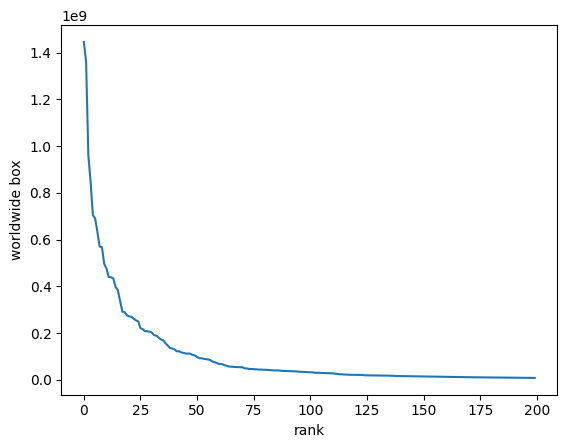

In [134]:
import matplotlib.pyplot as plt
import numpy as np

world_wide = []

with open('TopMoviesBoxOffice.txt', 'r', errors='ignore') as file:
        lines = file.readlines()
        for line in lines[1:]:
            world_wide.append(int(line.split(',')[3]))

xlst = np.arange(200)
plt.xlabel('rank')
plt.ylabel('worldwide box')
plt.plot(xlst, world_wide)

3.6

In [135]:
allintros = []
with open('TopMoviesIntro.txt', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:
        print(line.split(',')[3])
        for i in range(len(line.split(','))-3):
            allintros.append(line.split(',')[3+i])
# allintros = [st[:] for st in allintros]
print(allintros)

[Barbie and Ken are having the time of their lives in the colorful and seemingly perfect world of Barbie Land. However
[A plumber named Mario travels through an underground labyrinth with his brother Luigi
[The story of American scientist J. Robert Oppenheimer and his role in the development of the atomic bomb.]

[Still reeling from the loss of Gamora
[Dom Toretto and his family are targeted by the vengeful son of drug kingpin Hernan Reyes.]

[Miles Morales catapults across the multiverse
[With dreams of opening a shop in a city renowned for its chocolate
[A young mermaid makes a deal with a sea witch to trade her beautiful voice for human legs so she can discover the world above water and impress a prince.]

[Ethan Hunt and his IMF team must track down a dangerous weapon before it falls into the wrong hands.]

[Follows Ember and Wade
[Scott Lang and Hope Van Dyne are dragged into the Quantum Realm
[John Wick uncovers a path to defeating The High Table. But before he can earn his freed

In [136]:
import jieba
import stylecloud

def ciyun():

    word_list = allintros
    result = " ".join(word_list) #分词用空格隔开
        
    stylecloud.gen_stylecloud(
        text=result, # 上面分词的结果作为文本传给text参数
        size=512,
        font_path='msyh.ttc', # 字体设置
        palette='cartocolors.qualitative.Pastel_7', # 调色方案选取，从palettable里选择
        gradient='horizontal', # 渐变色方向选了垂直方向
        icon_name='fab fa-weixin',  # 蒙版选取，从Font Awesome里选
        output_name='test_ciyun.png') # 输出词云图

ciyun()